In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from tqdm.notebook import tqdm

from pycaret.regression import *

In [6]:
train_set = pd.read_csv('train.csv').iloc[:,1:]
train_set

,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),풍속(m/s),부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),총 작업량,TERMINAL_BCT,TERMINAL_BIT,TERMINAL_BNCT,TERMINAL_BNMT,TERMINAL_BPTC,TERMINAL_DDCT,TERMINAL_DPCT,TERMINAL_E1CT,TERMINAL_GWCT,TERMINAL_HJIT,TERMINAL_HJNC,TERMINAL_HKTL,TERMINAL_HPNT,TERMINAL_ICT,TERMINAL_IFPC,TERMINAL_IGCT,TERMINAL_JUCT,TERMINAL_KITL,TERMINAL_PCTC,TERMINAL_PNC,TERMINAL_PNCT,TERMINAL_PNIT,TERMINAL_SMGT,TERMINAL_SNCT,TERMINAL_UNCT,위치_광양,위치_군산,위치_부산,위치_울산,위치_인천,위치_평택,입항년도_2019,입항년도_2020,입항년도_2021,입항년도_2022,입항월_1,입항월_10,입항월_11,입항월_12,입항월_2,입항월_3,입항월_4,입항월_5,입항월_6,입항월_7,입항월_8,입항월_9,입항일_1,입항일_10,입항일_11,입항일_12,입항일_13,입항일_14,입항일_15,입항일_16,입항일_17,입항일_18,입항일_19,입항일_2,입항일_20,입항일_21,입항일_22,입항일_23,입항일_24,입항일_25,입항일_26,입항일_27,입항일_28,입항일_29,입항일_3,입항일_30,입항일_31,입항일_4,입항일_5,입항일_6,입항일_7,입항일_8,입항일_9,입항시_0,입항시_1,입항시_10,입항시_11,입항시_12,입항시_13,입항시_14,입항시_15,입항시_16,입항시_17,입항시_18,입항시_19,입항시_2,입항시_20,입항시_21,입항시_22,입항시_23,입항시_3,입항시_4,입항시_5,입항시_6,입항시_7,입항시_8,입항시_9,작업효율,작업시간(분)
0,2,421,389,0,7.3,0.0,3.8,1500.0,15.5,1151000,2236000,0,0,0,0,5,810,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1388.888889,1960.0
1,14,187,82,0,13.9,0.0,0.8,1500.0,15.5,1151000,2236000,0,0,0,0,5,269,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,852.382353,750.0
2,4,1300,1200,0,-5.6,0.0,4.2,1200.0,16.0,840000,2091000,0,0,0,0,3,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1488.000000,1080.0
3,3,218,214,0,19.0,0.0,6.1,2000.0,16.5,1210000,3677000,0,0,0,0,6,432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,610.400000,597.0
4,6,484,957,0,20.4,0.0,1.8,826.0,15.0,294000,819000,0,0,0,0,2,1441,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1764.571429,3480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48463,10,609,1250,0,14.4,0.0,2.1,1150.0,16.5,553000,1936000,0,2,0,0,2,1859,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1025.792453,1170.0
48464,5,506,547,0,26.6,0.0,0.5,1500.0,15.5,1151000,2236000,0,0,0,0,5,1053,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1070.415094,1470.0
48465,1,1046,796,0,-1.9,0.0,2.2,800.0,18.0,480000,1104000,0,0,2,1,0,1842,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1165.507463,1320.0
48466,27,319,165,0,23.2,0.0,2.5,1500.0,15.5,1151000,2236000,0,0,0,0,5,484,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0

In [7]:
test_set = pd.read_csv('test.csv').iloc[:,1:]
test_set

,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),풍속(m/s),부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),총 작업량,TERMINAL_BCT,TERMINAL_BIT,TERMINAL_BNCT,TERMINAL_BNMT,TERMINAL_BPTC,TERMINAL_DDCT,TERMINAL_DPCT,TERMINAL_E1CT,TERMINAL_GWCT,TERMINAL_HJIT,TERMINAL_HJNC,TERMINAL_HKTL,TERMINAL_HPNT,TERMINAL_ICT,TERMINAL_IFPC,TERMINAL_IGCT,TERMINAL_JUCT,TERMINAL_KITL,TERMINAL_PCTC,TERMINAL_PNC,TERMINAL_PNCT,TERMINAL_PNIT,TERMINAL_SMGT,TERMINAL_SNCT,TERMINAL_UNCT,위치_광양,위치_군산,위치_부산,위치_울산,위치_인천,위치_평택,입항년도_2019,입항년도_2020,입항년도_2021,입항년도_2022,입항월_1,입항월_10,입항월_11,입항월_12,입항월_2,입항월_3,입항월_4,입항월_5,입항월_6,입항월_7,입항월_8,입항월_9,입항일_1,입항일_10,입항일_11,입항일_12,입항일_13,입항일_14,입항일_15,입항일_16,입항일_17,입항일_18,입항일_19,입항일_2,입항일_20,입항일_21,입항일_22,입항일_23,입항일_24,입항일_25,입항일_26,입항일_27,입항일_28,입항일_29,입항일_3,입항일_30,입항일_31,입항일_4,입항일_5,입항일_6,입항일_7,입항일_8,입항일_9,입항시_0,입항시_1,입항시_10,입항시_11,입항시_12,입항시_13,입항시_14,입항시_15,입항시_16,입항시_17,입항시_18,입항시_19,입항시_2,입항시_20,입항시_21,입항시_22,입항시_23,입항시_3,입항시_4,입항시_5,입항시_6,입항시_7,입항시_8,입항시_9,작업효율,작업시간(분)
0,2,1341,2064,78,14.00,0.0,1.00,1100.0,18.00,688000,2310000,0,2,0,0,6,3483,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1784.125000,2270.0
1,8,255,511,0,18.00,0.0,0.90,600.0,14.00,195000,552000,0,0,0,2,0,766,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,776.666667,870.0
2,53,300,300,0,25.84,6.3,2.08,1040.0,14.00,416000,1000000,0,0,2,0,2,600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,894.690141,900.0
3,2,694,499,0,-5.50,0.0,2.50,800.0,18.00,480000,1104000,0,0,2,1,0,1193,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,799.210526,930.0
4,43,291,278,0,26.90,0.0,4.00,1500.0,15.50,1151000,2236000,0,0,0,0,5,569,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,989.970297,1380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12112,14,60,60,0,28.00,0.0,4.70,1224.0,18.00,768125,250000,0,2,0,0,0,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,629.106667,480.0
12113,21,391,476,0,23.30,0.1,0.70,2000.0,16.50,1210000,3677000,0,0,0,0,6,867,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,923.222222,885.0
12114,5,272,287,0,14.40,0.0,4.70,826.0,15.00,294000,819000,0,0,0,0,2,559,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,387.800000,960.0
12115,1,275,393,0,-2.00,0.0,3.60,1224.0,16.25,768125,1998100,0,0,0,0,4,668,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [11]:
X_train = train_set.drop('작업시간(분)', axis = 1)
y_train = train_set['작업시간(분)']
X_test = test_set.drop('작업시간(분)', axis = 1)
y_test = test_set['작업시간(분)']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((48468, 120), (48468,), (12117, 120), (12117,))

In [12]:
regressor = setup(data = train_set,
                 target = '작업시간(분)',
                 numeric_imputation = 'mean',
                 train_size = 0.9,
                 normalize = True,
                 silent = True) 

,Description,Value
0,session_id,7106
1,Target,작업시간(분)
2,Original Data,"(48468, 121)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,108
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(43621, 118)"


In [13]:
# 오래 걸림 약 9분

best_5_model = compare_models(sort = 'MAPE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,183.1456,99862.8867,315.7696,0.7411,0.2851,0.2154,17.9960
rf,Random Forest Regressor,187.4124,101023.5518,317.6408,0.7380,0.2905,0.2265,14.5930
lightgbm,Light Gradient Boosting Machine,186.5612,97736.1180,312.4010,0.7467,0.2926,0.2313,0.3010
gbr,Gradient Boosting Regressor,196.6196,106038.3739,325.3496,0.7253,0.3065,0.2452,2.8540
huber,Huber Regressor,215.0342,126676.3524,355.6034,0.6718,0.3420,0.2690,2.4930
par,Passive Aggressive Regressor,226.6207,133731.3175,365.2420,0.6536,0.3614,0.2886,0.1220
dt,Decision Tree Regressor,256.4371,193034.2658,438.9953,0.4992,0.3861,0.3013,0.3000
lr,Linear Regression,223.2792,122512.9430,349.7456,0.6825,0.3607,0.3044,0.6600
ridge,Ridge Regression,223.2837,122508.3328,349.7385,0.6826,0.3607,0.3045,0.0510
br,Bayesian Ridge,223.2021,122500.3335,349.7237,0.6826,0.3605,0.3046,0.5890


In [14]:
# 약 17분 걸림 

blended_model = blend_models(estimator_list = best_5_model, fold = 10, optimize = 'MAPE')
pred_holdout = predict_model(blended_model)
final_model = finalize_model(blended_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,186.5695,99354.3224,315.2052,0.7528,0.2897,0.2258
1,186.5784,93970.8104,306.5466,0.7428,0.2942,0.2327
2,180.8808,102634.1641,320.3657,0.7409,0.2832,0.2198
3,191.1093,107437.4597,327.7765,0.7361,0.2935,0.2283
4,181.4177,97311.8331,311.9484,0.7354,0.2884,0.2225
5,181.8231,86445.9141,294.0169,0.7628,0.2837,0.2227
6,180.4959,87744.3916,296.2168,0.7729,0.2840,0.2219
7,183.0283,102473.0235,320.1141,0.7278,0.2947,0.2380
8,179.7144,92465.8521,304.0820,0.7518,0.2833,0.2219
9,188.7762,112720.8833,335.7393,0.7305,0.2932,0.2258


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,175.8098,80849.8672,284.3411,0.7876,0.2767,0.2195


In [17]:
from sklearn.metrics import r2_score

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

y_pred = predict_model(final_model, X_test)['Label']

print(r2_score(y_test.values, y_pred.values))
print(MAPE(y_test.values, y_pred.values))

0.7313953583835973
22.271614516389576


In [18]:
regressor = setup(data = train_set,
                 target = '작업시간(분)',
                 numeric_imputation = 'mean',
                 train_size = 0.9,
                 normalize = True,
                 silent = True) 

,Description,Value
0,session_id,7056
1,Target,작업시간(분)
2,Original Data,"(48468, 121)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,108
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(43621, 119)"


In [19]:
# 오래 걸림 약 9분

best_3_model = compare_models(sort = 'MAPE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,182.8200,99174.4264,314.4591,0.7425,0.2862,0.2168,18.8700
rf,Random Forest Regressor,186.1060,99766.0405,315.4224,0.7409,0.2887,0.2248,16.2510
lightgbm,Light Gradient Boosting Machine,185.4816,96473.8517,310.2148,0.7494,0.2911,0.2294,0.2220
gbr,Gradient Boosting Regressor,195.7814,105505.2757,324.4980,0.7259,0.3058,0.2447,3.0090
huber,Huber Regressor,214.0721,125291.9996,353.7041,0.6744,0.3413,0.2684,2.9360
par,Passive Aggressive Regressor,224.9467,134697.8352,366.3346,0.6498,0.3680,0.2737,0.1370
dt,Decision Tree Regressor,257.3117,194391.5214,440.7120,0.4940,0.3870,0.3021,0.3610
br,Bayesian Ridge,222.1290,121121.8120,347.7681,0.6852,0.3599,0.3040,0.7230
ridge,Ridge Regression,222.2615,121124.9430,347.7716,0.6852,0.3605,0.3040,0.0470
lr,Linear Regression,222.2745,121127.8641,347.7757,0.6852,0.3607,0.3041,0.2650


In [20]:
# 약 11분 걸림 

blended_model = blend_models(estimator_list = best_3_model, fold = 10, optimize = 'MAPE')
pred_holdout = predict_model(blended_model)
final_model = finalize_model(blended_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,184.9370,99347.2762,315.1940,0.7510,0.2870,0.2200
1,188.2142,101563.3636,318.6901,0.7368,0.2864,0.2211
2,175.9974,84889.1672,291.3575,0.7785,0.2748,0.2119
3,177.8676,101085.5268,317.9395,0.7365,0.2790,0.2139
4,175.9043,83437.1194,288.8548,0.7749,0.2781,0.2149
5,176.1576,89377.1672,298.9601,0.7622,0.2762,0.2127
6,178.5458,94388.2842,307.2268,0.7553,0.2798,0.2143
7,178.3973,76774.3078,277.0818,0.7910,0.2705,0.2124
8,183.9272,102595.9687,320.3061,0.7330,0.2972,0.2311
9,184.0333,112360.8221,335.2027,0.7248,0.2863,0.2313


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,179.8147,89267.5101,298.7767,0.7725,0.2737,0.2117


In [21]:
y_pred = predict_model(final_model, X_test)['Label']

print(r2_score(y_test.values, y_pred.values))
print(MAPE(y_test.values, y_pred.values))

0.741107618631395
21.454882704826566


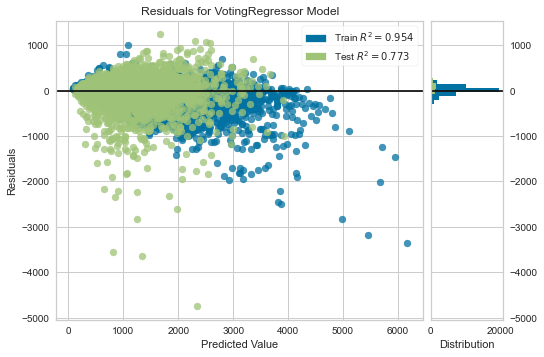

In [28]:
plot_model(blended_model)

In [29]:
save_model(final_model, 'final_model_without_FA')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='작업시간(분)',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                                             colsample_bytree=1.0,
                                                             importance_type='split',
                                                             learning_rate=0.1,
                                                             max